In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("F:/Entry/CarPrice_Assignment.csv")

In [3]:
# Display basic info about the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
# Step 1: Handle Missing Values
# Impute missing values for numerical columns with the median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()), axis=0)                                     

In [5]:
# Step 2: Encode Categorical Variables
# Identify categorical columns
cat_cols = df.select_dtypes(include = ['object']).columns

In [6]:
# Apply one-hot encoding for categorical variables
df = pd.get_dummies(df, columns = cat_cols, drop_first = True)

In [7]:
# Step 3: Feature Scaling
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
# Display processed data
print("Data after preprocessing:\n", df.head())

Data after preprocessing:
      car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0 -1.723622   1.743470  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566   
1 -1.706724   1.743470  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566   
2 -1.689826   0.133509  -0.708596  -0.231513 -0.190566  -0.543527    0.514882   
3 -1.672928   0.938490   0.173698   0.207256  0.136542   0.235942   -0.420797   
4 -1.656029   0.938490   0.107110   0.207256  0.230001   0.235942    0.516807   

   enginesize  boreratio    stroke  ...  cylindernumber_three  \
0    0.074449   0.519071 -1.839377  ...                 False   
1    0.074449   0.519071 -1.839377  ...                 False   
2    0.604046  -2.404880  0.685946  ...                 False   
3   -0.431076  -0.517266  0.462183  ...                 False   
4    0.218885  -0.517266  0.462183  ...                 False   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                  False      

In [9]:
from sklearn.model_selection import train_test_split
# Define features (X) and target (y)
x = df.drop(columns=['price'])# Target variable
y = df['price'] 
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [12]:
# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [14]:
# Predict and evaluate
y_pred_lr = lr_model.predict(x_test)
print("Linear Regression R^2 Score:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))

Linear Regression R^2 Score: -1.2390561677933665
Linear Regression RMSE: 1.6682824020426643


C:\Users\HABEEB\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [15]:
#  Decision Tree Regressor


In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
# Initialize and train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [19]:
# Predict and evaluate
y_pred_dt = dt_model.predict(x_test)
print("Decision Tree R^2 Score:", r2_score(y_test, y_pred_dt))
print("Decision Tree RMSE:", mean_squared_error(y_test, y_pred_dt, squared=False))

Decision Tree R^2 Score: 0.8663140548508911
Decision Tree RMSE: 0.40764296329123656


C:\Users\HABEEB\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [20]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
# Initialize and train the model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
# Predict and evaluate
y_pred_rf = rf_model.predict(x_test)
print("Random Forest R^2 Score:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))

Random Forest R^2 Score: 0.9538572755297973
Random Forest RMSE: 0.23949072093782228


C:\Users\HABEEB\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [22]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
# Initialize and train the model
gb_model = GradientBoostingRegressor(random_state=42,n_estimators=100)
gb_model.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [23]:
y_pred_gb = gb_model.predict(x_test)
print("Gradient Boosting R^2 Score:", r2_score(y_test, y_pred_gb))
print("Gradient Boosting RMSE:", mean_squared_error(y_test, y_pred_gb, squared=False))

Gradient Boosting R^2 Score: 0.9323253507901127
Gradient Boosting RMSE: 0.2900347806865642


C:\Users\HABEEB\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
#Support Vector Regressor (SVR)
from sklearn.svm import SVR

In [26]:
# Initialize and train the model
svr_model = SVR(kernel= 'rbf')
svr_model.fit(x_train, y_train)

SVR()

In [28]:
# Predict and evaluate
y_pred_svr = svr_model.predict(x_test)
print("Support Vector Regressor R^2 Score:", r2_score(y_test, y_pred_svr))
print("Support Vector Regressor RMSE:", mean_squared_error(y_test, y_pred_svr, squared=False))

Support Vector Regressor R^2 Score: 0.8758463510795618
Support Vector Regressor RMSE: 0.3928410097010676


C:\Users\HABEEB\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to calculate and print evaluation metrics
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}")
    return mse, mae, r2

# Evaluate each model
results = {}
results['Linear Regression'] = evaluate_model(y_test, y_pred_lr, "Linear Regression")
results['Decision Tree'] = evaluate_model(y_test, y_pred_dt, "Decision Tree")
results['Random Forest'] = evaluate_model(y_test, y_pred_rf, "Random Forest")
results['Gradient Boosting'] = evaluate_model(y_test, y_pred_gb, "Gradient Boosting")
results['Support Vector Regressor'] = evaluate_model(y_test, y_pred_svr, "Support Vector Regressor")

# Optional: Compare and find the best performing model based on R2
best_model = max(results, key=lambda x: results[x][2])  # based on R² score
print(f"\nThe best performing model is: {best_model} with R²: {results[best_model][2]:.2f}")

Linear Regression - MSE: 2.78, MAE: 0.91, R2: -1.24
Decision Tree - MSE: 0.17, MAE: 0.26, R2: 0.87
Random Forest - MSE: 0.06, MAE: 0.17, R2: 0.95
Gradient Boosting - MSE: 0.08, MAE: 0.21, R2: 0.93
Support Vector Regressor - MSE: 0.15, MAE: 0.26, R2: 0.88

The best performing model is: Random Forest with R²: 0.95


Analysis
Compare Metrics: Review each model’s R², MSE, and MAE values to assess how accurately they predict car prices.
Identify the Best Model: The model with the highest R² score and the lowest MSE and MAE values typically indicates the best performance, showing it fits the data closely and has minimal prediction error.
Justification: The best model should ideally balance all three metrics, though R² is often prioritized in regression tasks to understand the explained variability.
This evaluation will provide insight into the model that most effectively captures the relationships between features and the target variable (car prices) in the dataset.


In [ ]:
#Feature Importance Analysis 

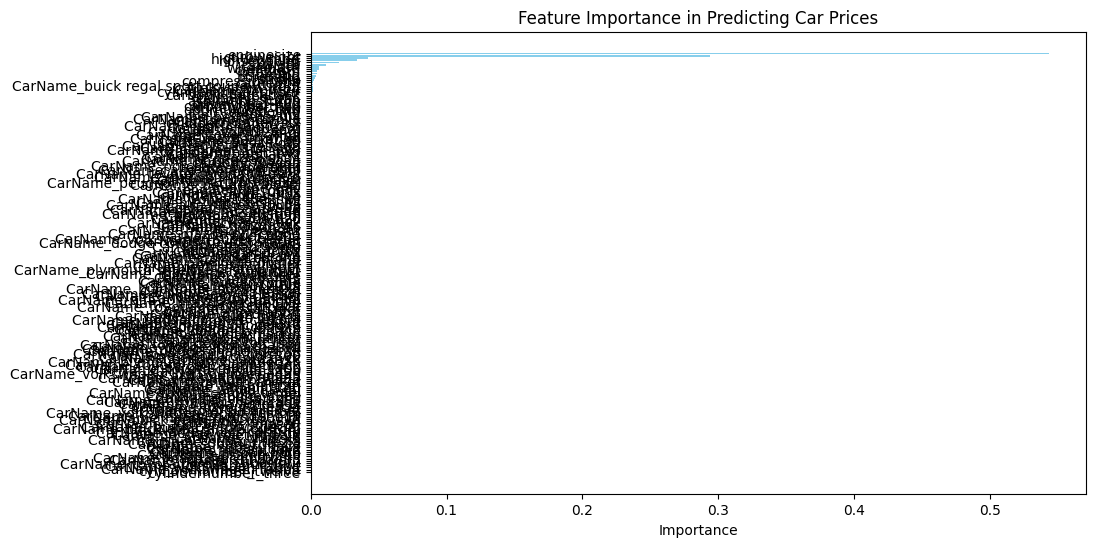

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'rf_model' is the trained Random Forest model
feature_importances = rf_model.feature_importances_
features = x_train.columns  # Ensure X_train is a DataFrame to get feature names

# Create a DataFrame to hold feature importance values
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance in Predicting Car Prices')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()

In [33]:
# Feature Coefficients for Linear Regression
# Assuming 'lr_model' is the trained Linear Regression model
coefficients = lr_model.coef_
features = x_train.columns

# Create a DataFrame to hold coefficients
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)  # Sort by absolute value of coefficients

# Display the significant coefficients
print("Top features based on Linear Regression Coefficients:")
print(coef_df)

Top features based on Linear Regression Coefficients:
                              Feature   Coefficient
25                     CarName_bmw x1  5.096630e+00
26                     CarName_bmw x3  4.921804e+00
29                     CarName_bmw z4  4.587323e+00
24                   CarName_bmw 320i  3.417571e+00
126             CarName_toyota carina -3.322615e+00
..                                ...           ...
119               CarName_subaru baja  5.551115e-17
131  CarName_toyota corolla 1600 (sw) -5.551115e-17
148         CarName_volkswagen rabbit -2.775558e-17
143          CarName_vokswagen rabbit -2.775558e-17
180              cylindernumber_three  0.000000e+00

[190 rows x 2 columns]


Interpretation and Feature Selection
High Feature Importance / Large Coefficients: Features with the highest importance values (or largest coefficients in Linear Regression) have the strongest influence on car prices.
Feature Selection: The top-ranked features (e.g., top 5 or top 10) are generally considered significant and may be retained for a more simplified or interpretable model.
Combining Insights: You may find that similar features rank highly across multiple models, providing a robust basis for identifying the significant variables affecting car prices.

In [35]:
#Hyperparameter Tuning Using Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameters and values for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],      # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples at leaf nodes
}

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

# Best parameters and model
best_rf_model = grid_search.best_estimator_
print("Best Hyperparameters for Random Forest:", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [42]:
#Evaluating the Tuned Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fit the original rf_model with default parameters on the training data
rf_model.fit(x_train, y_train)  # Assuming X_train and y_train are defined

# Prediction using the original model (non-tuned)
y_pred_original = rf_model.predict(x_test)
r2_original = r2_score(y_test, y_pred_original)

# Evaluate the tuned model
y_pred_optimized = best_rf_model.predict(x_test)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Tuned Model Performance - MSE: {mse_optimized:.2f}, MAE: {mae_optimized:.2f}, R2: {r2_optimized:.2f}")
print(f"Original Model Performance - R2: {r2_original:.2f}")
print(f"Improvement in R2 Score: {r2_optimized - r2_original:.2f}")

Tuned Model Performance - MSE: 0.06, MAE: 0.17, R2: 0.95
Original Model Performance - R2: 0.95
Improvement in R2 Score: 0.00
